### Import Libraries

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
df = pd.read_csv('./Assets/Datasets/Cleaned_data.csv')
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,1,1,0,0,0,0,Digital Wallet,70.01,1,4210.7
1,2,Jakarta,High End,0,0,0,0,0,0,Pulsa,91.91,1,3511.3
2,8,Jakarta,High End,0,0,1,0,1,1,Pulsa,129.55,1,6983.6
3,28,Jakarta,High End,0,0,1,1,1,1,Pulsa,136.24,1,6503.9
4,49,Jakarta,High End,0,1,1,0,1,1,Debit,134.81,1,6942.0


### Data Validation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tenure Months                 7043 non-null   int64  
 1   Location                      7043 non-null   object 
 2   Device Class                  7043 non-null   object 
 3   Games Product                 7043 non-null   int64  
 4   Music Product                 7043 non-null   int64  
 5   Education Product             7043 non-null   int64  
 6   Call Center                   7043 non-null   int64  
 7   Video Product                 7043 non-null   int64  
 8   Use MyApp                     7043 non-null   int64  
 9   Payment Method                7043 non-null   object 
 10  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 11  Churn Label                   7043 non-null   int64  
 12  CLTV (Predicted Thou. IDR)    7043 non-null   float64
dtypes: 

### EDA

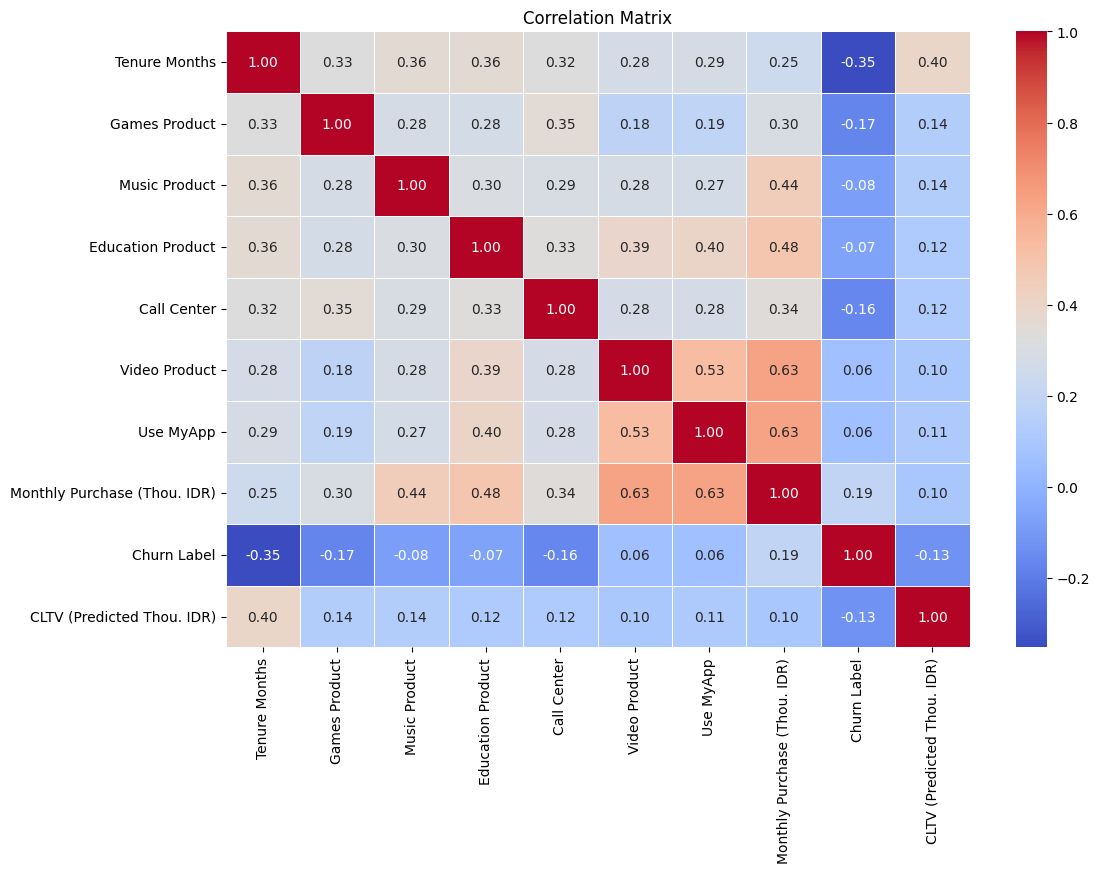

In [4]:
# Selecting only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

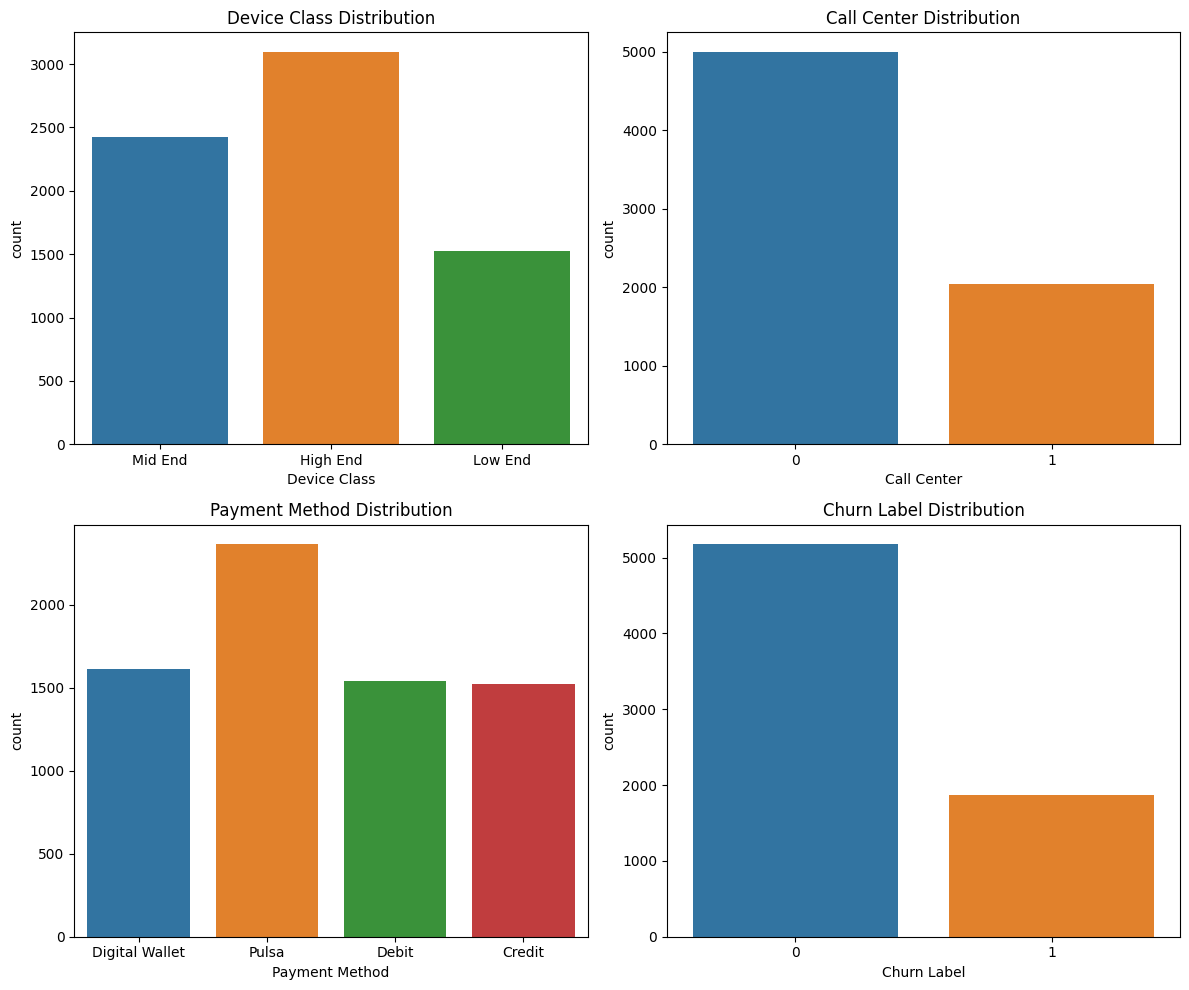

In [12]:
# Selecting a few categorical columns for bar plots
categorical_columns = ['Device Class', 'Call Center', 'Payment Method', 'Churn Label']

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting bar plots for each feature
for i, column in enumerate(categorical_columns):
    row, col = i // 2, i % 2
    sns.countplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{column} Distribution')

# Adjusting layout
plt.tight_layout()
plt.show()

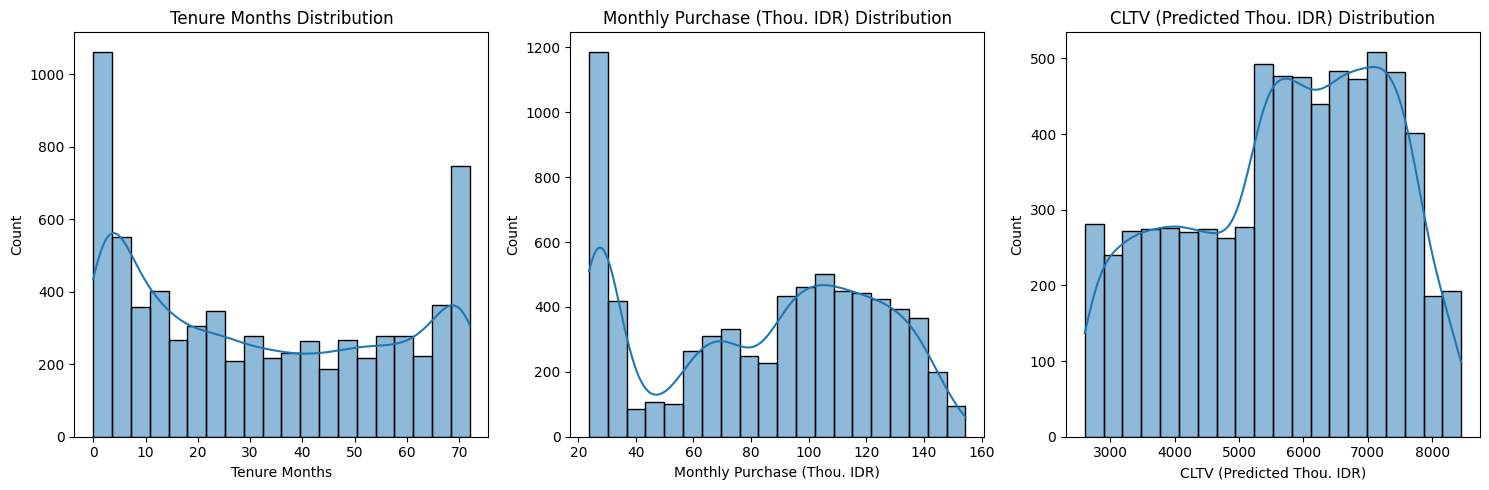

In [14]:
# Selecting a few numerical columns for histograms
numerical_columns = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']

# Setting up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Plotting histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')

# Adjusting layout
plt.tight_layout()
plt.show()